In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Exploration


In [2]:
df = pd.read_csv('/kaggle/input/crime-in-los-angeles-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv')  # Assuming the file is named 'crime.csv'

df.head()




DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  201220752  09/16/2020 12:00:00 AM  09/16/2020 12:00:00 AM      1230    12   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2  77th Street         1259         2     745   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO  Adult Other   
1                           BATTERY - SIMPLE ASSAULT  ...     IC  Invest Cont   
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC  Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    624.0      NaN       NaN      NaN   
1    624.0      NaN       NaN      NaN   
2    745.0      NaN       NaN      NaN   
3    745.0    998.0       NaN      NaN   
4    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    700 E  73RD                         ST          NaN  33.9739 -118.2630  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317854 entries, 0 to 317853
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           317854 non-null  int64  
 1   Date Rptd       317854 non-null  object 
 2   DATE OCC        317854 non-null  object 
 3   TIME OCC        317854 non-null  int64  
 4   AREA            317854 non-null  int64  
 5   AREA NAME       317854 non-null  object 
 6   Rpt Dist No     317854 non-null  int64  
 7   Part 1-2        317854 non-null  int64  
 8   Crm Cd          317854 non-null  int64  
 9   Crm Cd Desc     317854 non-null  object 
 10  Mocodes         274531 non-null  object 
 11  Vict Age        317854 non-null  int64  
 12  Vict Sex        276448 non-null  object 
 13  Vict Descent    276443 non-null  object 
 14  Premis Cd       317849 non-null  float64
 15  Premis Desc     317746 non-null  object 
 16  Weapon Used Cd  116477 non-null  float64
 17  Weapon Des

In [4]:
df.describe()

DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  3.178540e+05  317854.000000  317854.000000  317854.000000   
mean   2.050625e+08    1352.762504      10.798860    1126.046200   
std    4.965168e+06     650.001432       6.039124     604.005822   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.009132e+08     920.000000       6.000000     628.000000   
50%    2.018096e+08    1430.000000      11.000000    1149.000000   
75%    2.108086e+08    1900.000000      16.000000    1621.000000   
max    2.199178e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  317854.000000  317854.000000  317854.000000  317849.000000   
mean        1.412765     508.928842      30.073348     294.451117   
std         0.492332     210.338553      21.716577     212.949440   
min         1.000000     110.000000      -1.000000     101.000000   
25%         1.000000     330.000000      12.000000     101.000000   
50%         1.000000     510.000000      31.000000     203.000000   
75%         2.000000     626.000000      45.000000     501.000000   
max         2.000000     956.000000     120.000000     971.000000   

       Weapon Used Cd       Crm Cd 1      Crm Cd 2    Crm Cd 3    Crm Cd 4  \
count   116477.000000  317851.000000  25981.000000  880.000000   30.000000   
mean       362.523777     508.657604    955.427428  982.376136  989.866667   
std        123.158198     210.125700    116.066327   53.633150   34.225150   
min        101.000000     110.000000    210.000000  626.000000  821.000000   
25%        308.000000     330.000000    998.000000  998.000000  998.000000   
50%        400.000000     510.000000    998.000000  998.000000  998.000000   
75%        400.000000     626.000000    998.000000  998.000000  998.000000   
max        516.000000     956.000000    999.000000  999.000000  999.000000   

                 LAT            LON  
count  317854.000000  317854.000000  
mean       33.825098    -117.495603  
std         2.893775      10.044824  
min         0.000000    -118.667600  
25%        34.007800    -118.429600  
50%        34.057400    -118.321300  
75%        34.162900    -118.274000  
max        34.334300       0.000000

# Data Cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())



DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            43323
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
Crm Cd 1               3
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LOCATION               0
Cross Street      260877
LAT                    0
LON                    0
dtype: int64


In [6]:
# Drop columns with a high percentage of missing values
df = df.drop(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1)

# Impute missing values in specific columns
df['Mocodes'].fillna('Unknown', inplace=True)
df['Vict Sex'].fillna(df['Vict Sex'].mode()[0], inplace=True)
df['Vict Descent'].fillna(df['Vict Descent'].mode()[0], inplace=True)
df['Premis Cd'].fillna(df['Premis Cd'].mode()[0], inplace=True)
df['Premis Desc'].fillna('Unknown', inplace=True)
df['Crm Cd 1'].fillna(df['Crm Cd 1'].mode()[0], inplace=True)


In [7]:
# Check for duplicates
print(df.duplicated().sum())




0


In [8]:
# Convert date columns to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


/tmp/ipykernel_94/4289721058.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
/tmp/ipykernel_94/4289721058.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

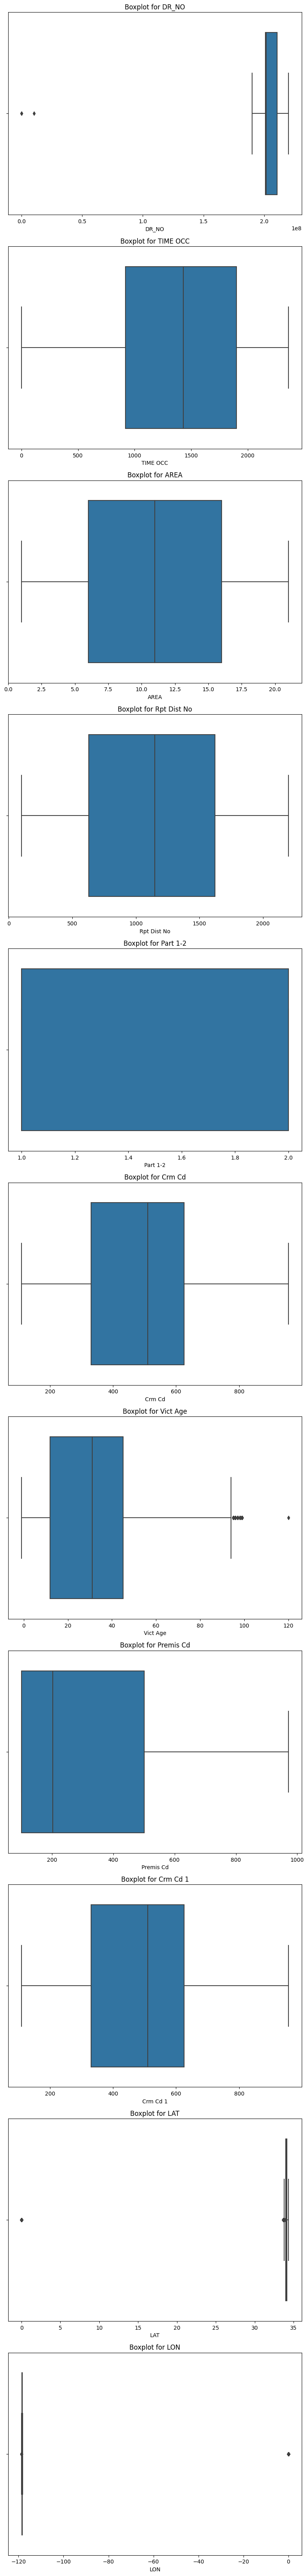

In [9]:
# Step 1: Identify and visualize outliers for each numerical column
num_columns = df.select_dtypes(include=['number']).columns
num_plots = len(num_columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6 * num_plots))

for i, column in enumerate(num_columns):
    # Visualize distribution and identify outliers using boxplot
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


In [10]:
# Step 2: Handle outliers for each numerical column (excluding 'LAT' and 'LON')
for column in num_columns:
    if column not in ['LAT', 'LON']:
        # Calculate the IQR for outlier detection
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Define the upper and lower bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Handle outliers (e.g., set to NaN or correct)
        # For demonstration, let's replace outliers with NaN
        df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), other=None)
        
        

In [11]:
df.describe()


DR_NO                      Date Rptd  \
count  3.178510e+05                         317854   
mean   2.050644e+08  2020-10-26 17:36:34.539631616   
min    1.901011e+08            2020-01-01 00:00:00   
25%    2.009132e+08            2020-05-31 00:00:00   
50%    2.018096e+08            2020-10-26 00:00:00   
75%    2.108086e+08            2021-03-28 00:00:00   
max    2.199178e+08            2021-08-16 00:00:00   
std    4.926378e+06                            NaN   

                            DATE OCC       TIME OCC           AREA  \
count                         317854  317854.000000  317854.000000   
mean   2020-10-20 02:06:09.996287744    1352.762504      10.798860   
min              2020-01-01 00:00:00       1.000000       1.000000   
25%              2020-05-24 00:00:00     920.000000       6.000000   
50%              2020-10-17 00:00:00    1430.000000      11.000000   
75%              2021-03-20 00:00:00    1900.000000      16.000000   
max              2021-08-16 00:00:00    2359.000000      21.000000   
std                              NaN     650.001432       6.039124   

         Rpt Dist No       Part 1-2         Crm Cd       Vict Age  \
count  317854.000000  317854.000000  317854.000000  317619.000000   
mean     1126.046200       1.412765     508.928842      30.023220   
min       101.000000       1.000000     110.000000      -1.000000   
25%       628.000000       1.000000     330.000000      12.000000   
50%      1149.000000       1.000000     510.000000      31.000000   
75%      1621.000000       2.000000     626.000000      45.000000   
max      2199.000000       2.000000     956.000000      94.000000   
std       604.005822       0.492332     210.338553      21.646166   

           Premis Cd       Crm Cd 1            LAT            LON  
count  317854.000000  317854.000000  317854.000000  317854.000000  
mean      294.448074     508.657616      33.825098    -117.495603  
min       101.000000     110.000000       0.000000    -118.667600  
25%       101.000000     330.000000      34.007800    -118.429600  
50%       203.000000     510.000000      34.057400    -118.321300  
75%       501.000000     626.000000      34.162900    -118.274000  
max       971.000000     956.000000      34.334300       0.000000  
std       212.949147     210.124708       2.893775      10.044824

In [12]:
# Replace 0.00 with NaN in 'LON'
df['LON'] = df['LON'].replace(0.00, pd.NA)


In [13]:
# Replace negative 'LAT' value with NaN
df['LAT'] = df['LAT'].where(df['LAT'] >= 0, other=pd.NA)


In [14]:
# Subtract 1 from 'TIME OCC' values
df['TIME OCC'] = df['TIME OCC'] - 1


In [15]:
# Replace negative 'Vict Age' value with NaN
df['Vict Age'] = df['Vict Age'].where(df['Vict Age'] >= 0, other=pd.NA)


In [16]:
# Mean imputation for 'Vict Age'
mean_age = df['Vict Age'].mean()
df['Vict Age'] = df['Vict Age'].fillna(mean_age)


In [17]:
df.describe()


DR_NO                      Date Rptd  \
count  3.178510e+05                         317854   
mean   2.050644e+08  2020-10-26 17:36:34.539631616   
min    1.901011e+08            2020-01-01 00:00:00   
25%    2.009132e+08            2020-05-31 00:00:00   
50%    2.018096e+08            2020-10-26 00:00:00   
75%    2.108086e+08            2021-03-28 00:00:00   
max    2.199178e+08            2021-08-16 00:00:00   
std    4.926378e+06                            NaN   

                            DATE OCC       TIME OCC           AREA  \
count                         317854  317854.000000  317854.000000   
mean   2020-10-20 02:06:09.996287744    1351.762504      10.798860   
min              2020-01-01 00:00:00       0.000000       1.000000   
25%              2020-05-24 00:00:00     919.000000       6.000000   
50%              2020-10-17 00:00:00    1429.000000      11.000000   
75%              2021-03-20 00:00:00    1899.000000      16.000000   
max              2021-08-16 00:00:00    2358.000000      21.000000   
std                              NaN     650.001432       6.039124   

         Rpt Dist No       Part 1-2         Crm Cd       Vict Age  \
count  317854.000000  317854.000000  317854.000000  317854.000000   
mean     1126.046200       1.412765     508.928842      30.023415   
min       101.000000       1.000000     110.000000       0.000000   
25%       628.000000       1.000000     330.000000      12.000000   
50%      1149.000000       1.000000     510.000000      31.000000   
75%      1621.000000       2.000000     626.000000      45.000000   
max      2199.000000       2.000000     956.000000      94.000000   
std       604.005822       0.492332     210.338553      21.638023   

           Premis Cd       Crm Cd 1            LAT  
count  317854.000000  317854.000000  317854.000000  
mean      294.448074     508.657616      33.825098  
min       101.000000     110.000000       0.000000  
25%       101.000000     330.000000      34.007800  
50%       203.000000     510.000000      34.057400  
75%       501.000000     626.000000      34.162900  
max       971.000000     956.000000      34.334300  
std       212.949147     210.124708       2.893775

# 1- Crime Distribution:


In [18]:
# Display the most common types of crimes
most_common_crimes = df['Crm Cd 1'].value_counts().head(10)
print("Top 10 Most Common Types of Crimes:")
print(most_common_crimes)


Top 10 Most Common Types of Crimes:
Crm Cd 1
510.0    34215
624.0    26078
740.0    21223
330.0    20392
310.0    19953
230.0    19342
626.0    17485
440.0    17291
420.0    14526
354.0    12620
Name: count, dtype: int64


<Figure size 1400x800 with 0 Axes>

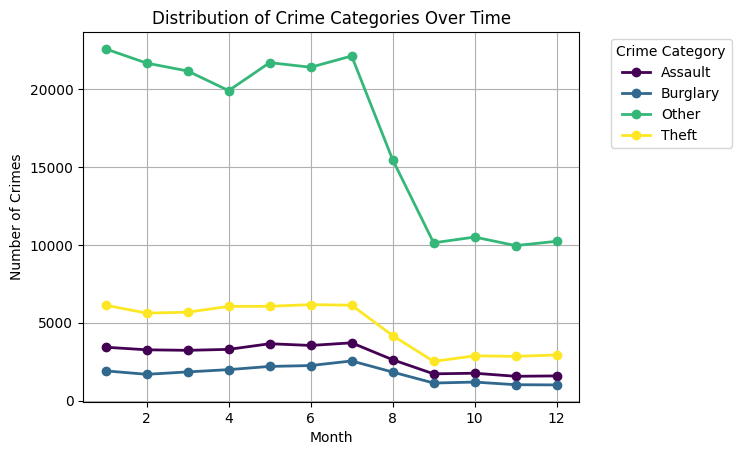

In [19]:
# Create a new column for the month of occurrence
df['Month'] = df['DATE OCC'].dt.month

# Define a function to map crime types to categories
def map_to_category(crime_type):
    # Example mapping: Group common crime types into broader categories
    if crime_type in [330, 510, 956]:
        return 'Theft'
    elif crime_type in [740, 745, 648]:
        return 'Assault'
    elif crime_type in [230, 250, 623]:
        return 'Burglary'
    else:
        return 'Other'

# Apply the mapping function to create a new 'Crime Category' column
df['Crime Category'] = df['Crm Cd 1'].apply(map_to_category)

# Group by month and crime category, then count occurrences
crime_distribution = df.groupby(['Month', 'Crime Category']).size().reset_index(name='Count')

# Pivot the table for better visualization
crime_pivot = crime_distribution.pivot(index='Month', columns='Crime Category', values='Count')

# Plot the distribution of crime categories over time using a line plot
plt.figure(figsize=(14, 8))
crime_pivot.plot(kind='line', marker='o', colormap='viridis', linewidth=2)
plt.title('Distribution of Crime Categories Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# 2- Temporal Analysis:


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

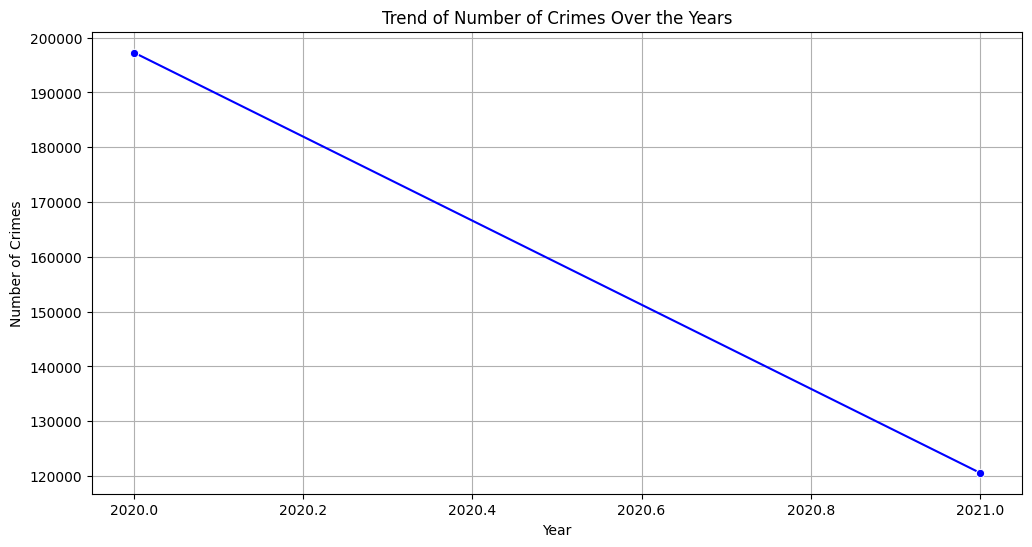

In [20]:
# Extract the year from the 'DATE OCC' column
df['Year'] = df['DATE OCC'].dt.year

# Group by year and count the number of crimes
crimes_by_year = df['Year'].value_counts().sort_index()

# Plot the trend of the number of crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=crimes_by_year.index, y=crimes_by_year.values, marker='o', color='blue')
plt.title('Trend of Number of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

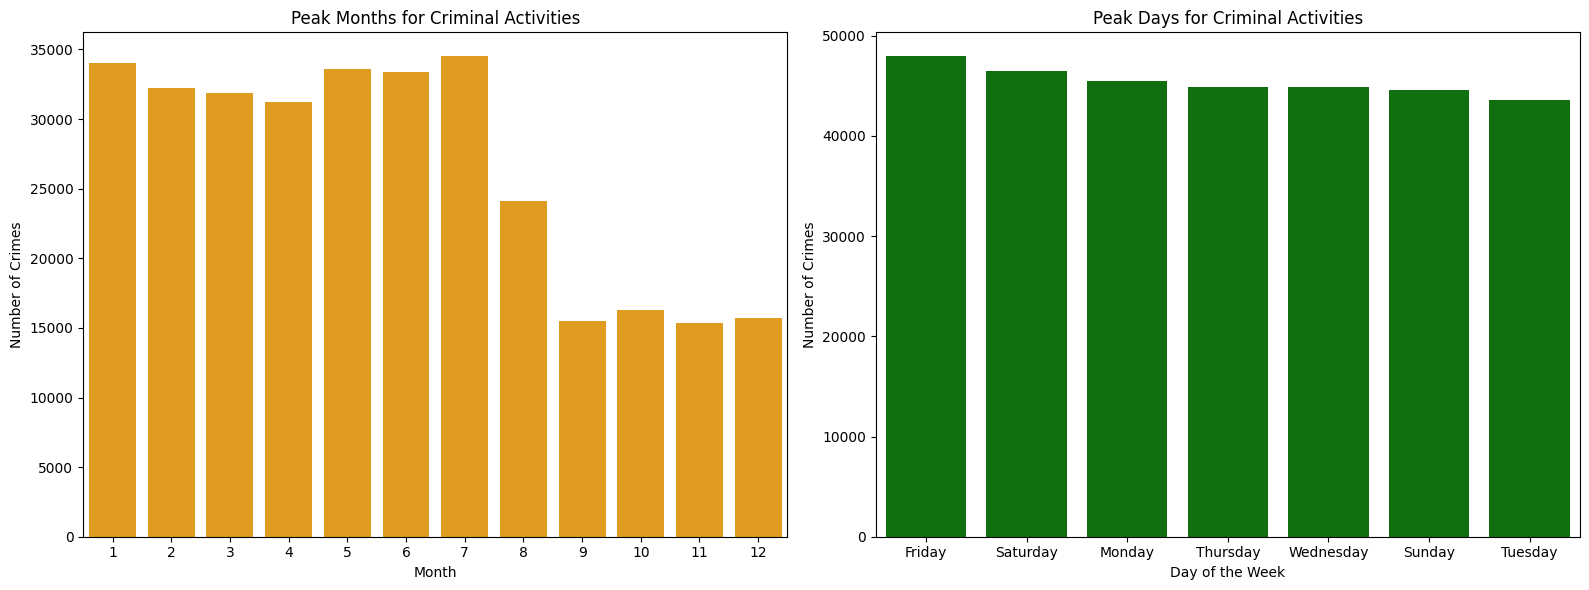

In [21]:
# Extract the month and day of the week from the 'DATE OCC' column
df['Month'] = df['DATE OCC'].dt.month
df['Day of Week'] = df['DATE OCC'].dt.day_name()

# Group by month and day of the week and count the number of crimes
crimes_by_month = df['Month'].value_counts().sort_index()
crimes_by_day = df['Day of Week'].value_counts()

# Plot the peak months and days for criminal activities
plt.figure(figsize=(16, 6))

# Plot for peak months
plt.subplot(1, 2, 1)
sns.barplot(x=crimes_by_month.index, y=crimes_by_month.values, color='orange')
plt.title('Peak Months for Criminal Activities')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Plot for peak days
plt.subplot(1, 2, 2)
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, color='green')
plt.title('Peak Days for Criminal Activities')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')

plt.tight_layout()
plt.show()


# 3- Spatial Analysis:


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


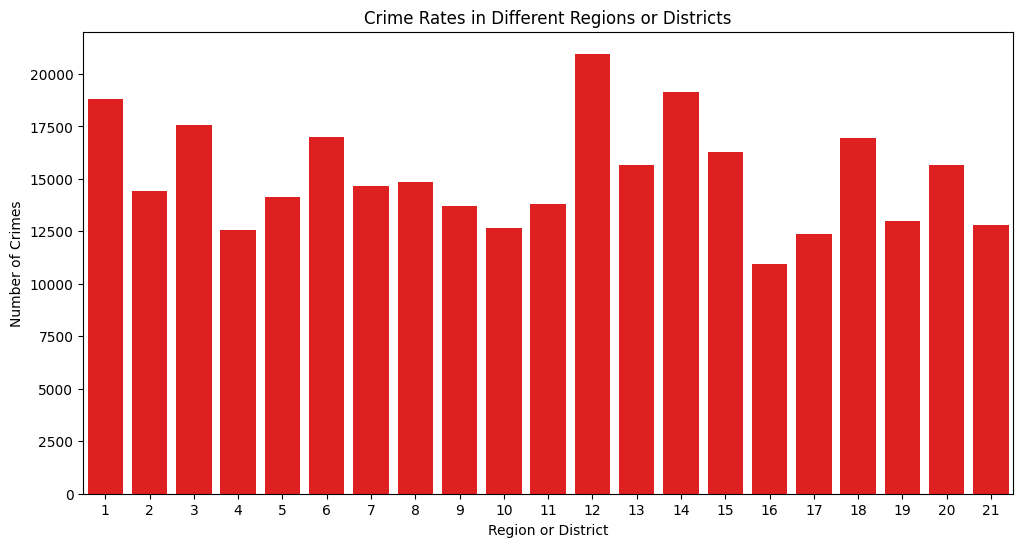

In [22]:
# Group by 'AREA' and count the number of crimes
crimes_by_area = df['AREA'].value_counts()

# Plot the crime rates in different regions or districts
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_by_area.index, y=crimes_by_area.values, color='red')
plt.title('Crime Rates in Different Regions or Districts')
plt.xlabel('Region or District')
plt.ylabel('Number of Crimes')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


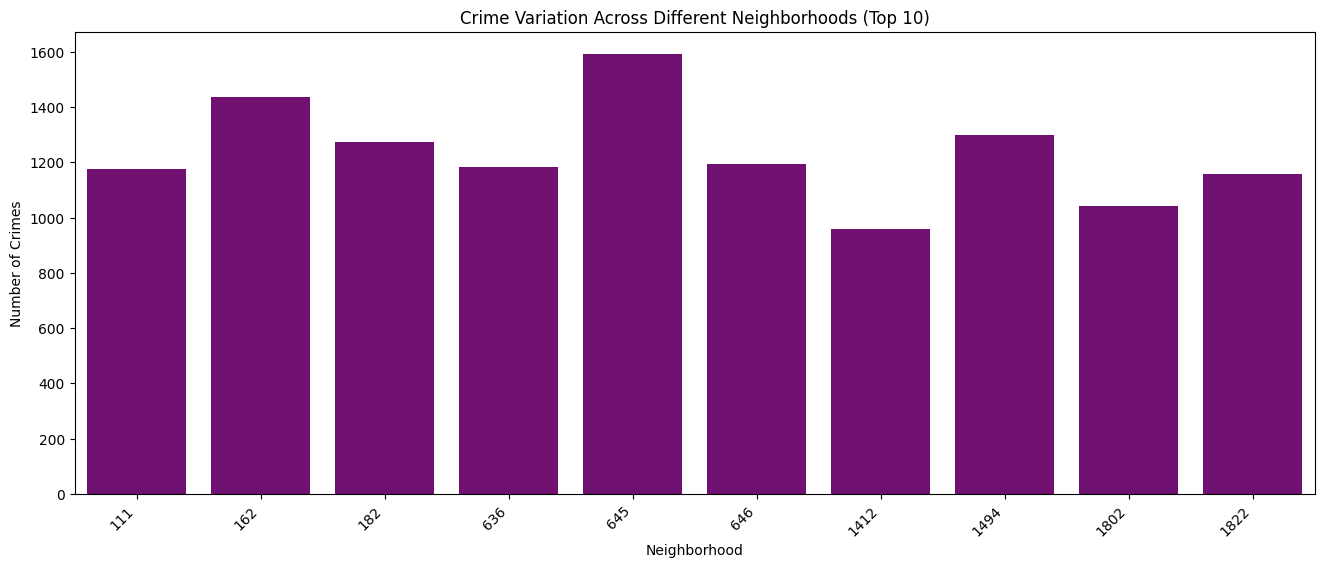

In [23]:
# Group by 'Rpt Dist No' and count the number of crimes
crimes_by_neighborhood = df['Rpt Dist No'].value_counts()

# Plot the crime variation across different neighborhoods
plt.figure(figsize=(16, 6))
sns.barplot(x=crimes_by_neighborhood.index[:10], y=crimes_by_neighborhood.values[:10], color='purple')
plt.title('Crime Variation Across Different Neighborhoods (Top 10)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()


# 4 -Demographic Analysis:


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


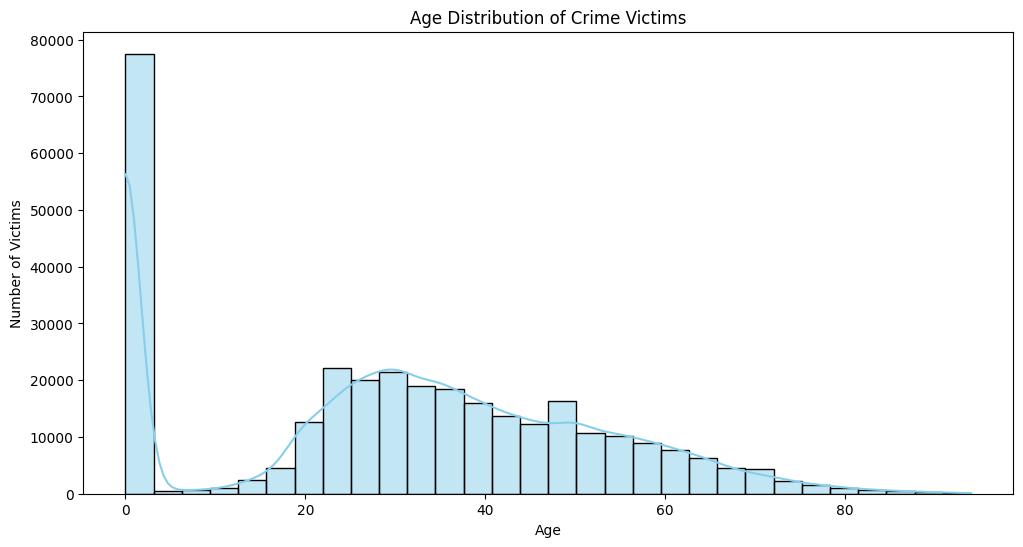

In [24]:
# Plot the age distribution of crime victims
plt.figure(figsize=(12, 6))
sns.histplot(df['Vict Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Crime Victims')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


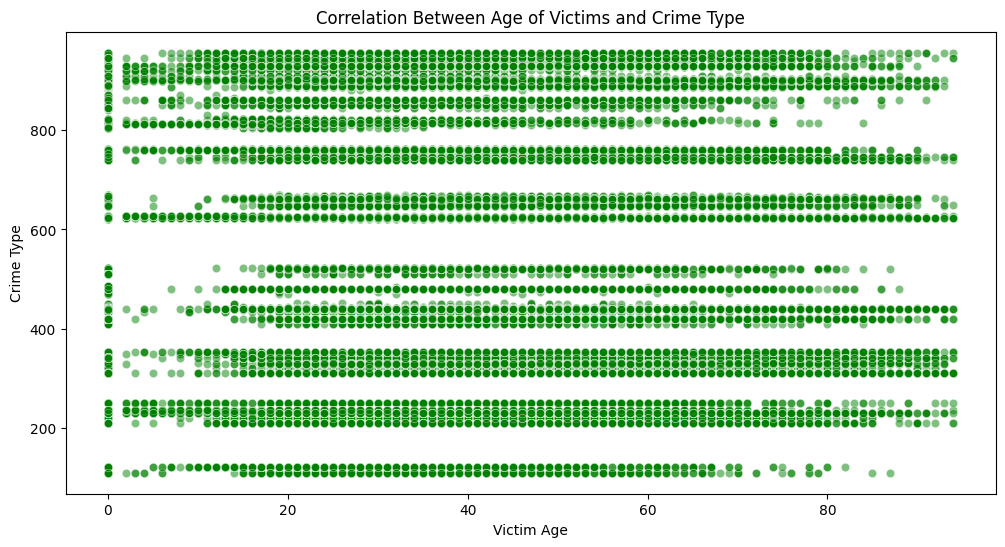

In [25]:
# Plot a scatter plot to show the correlation between age and crime type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Vict Age', y='Crm Cd 1', data=df, alpha=0.5, color='green')
plt.title('Correlation Between Age of Victims and Crime Type')
plt.xlabel('Victim Age')
plt.ylabel('Crime Type')
plt.show()


# 5- Time of Day Analysis:


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


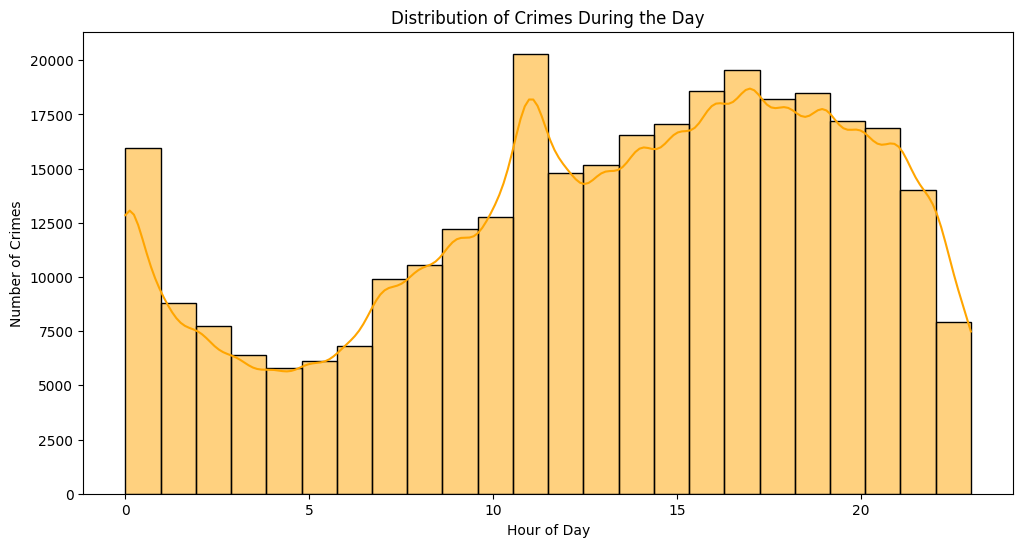

In [26]:
# Extract the hour from the 'TIME OCC' column
df['Hour of Day'] = df['TIME OCC'] // 100

# Plot the distribution of crimes during the day
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour of Day'].dropna(), bins=24, kde=True, color='orange')
plt.title('Distribution of Crimes During the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

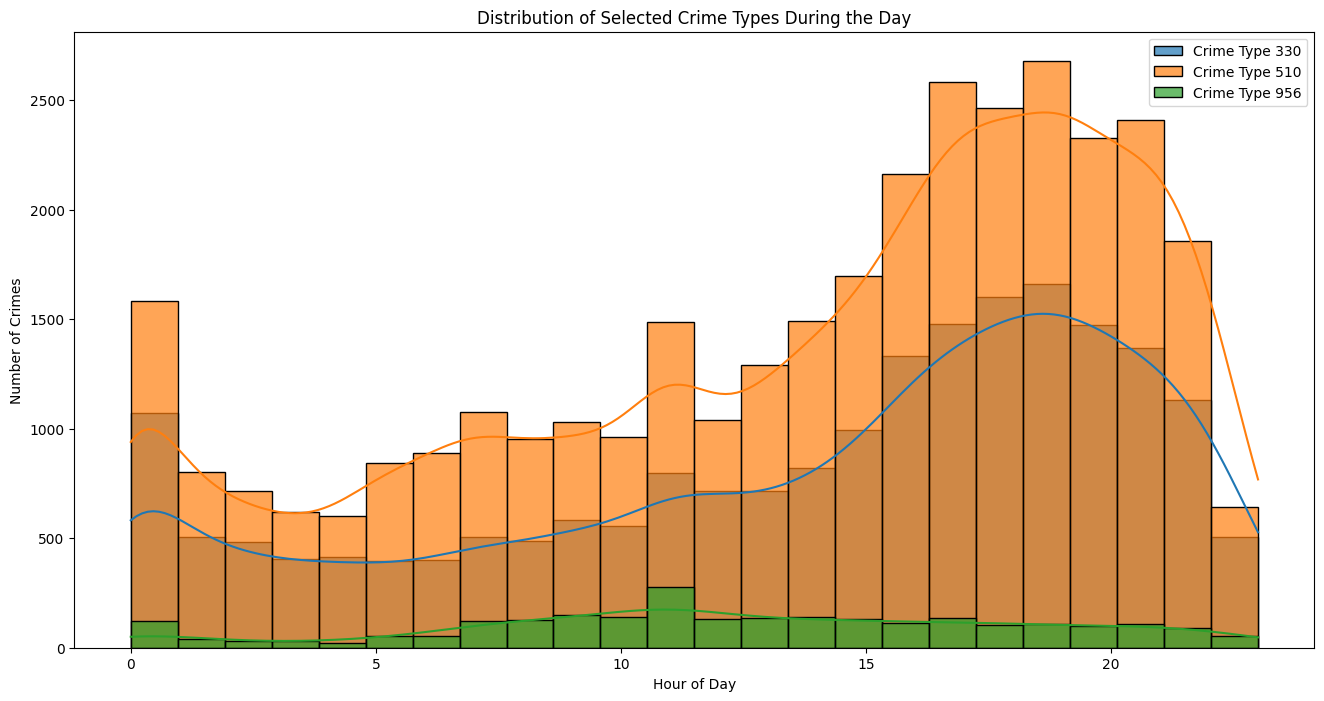

In [27]:
# Select a few crime types for analysis (adjust as needed)
selected_crime_types = [330, 510, 956]

# Plot the distribution of selected crime types during the day
plt.figure(figsize=(16, 8))
for crime_type in selected_crime_types:
    crime_subset = df[df['Crm Cd 1'] == crime_type]
    sns.histplot(crime_subset['Hour of Day'].dropna(), bins=24, kde=True, label=f'Crime Type {crime_type}', alpha=0.7)

plt.title('Distribution of Selected Crime Types During the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


# 6- Day of the Week Analysis:



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


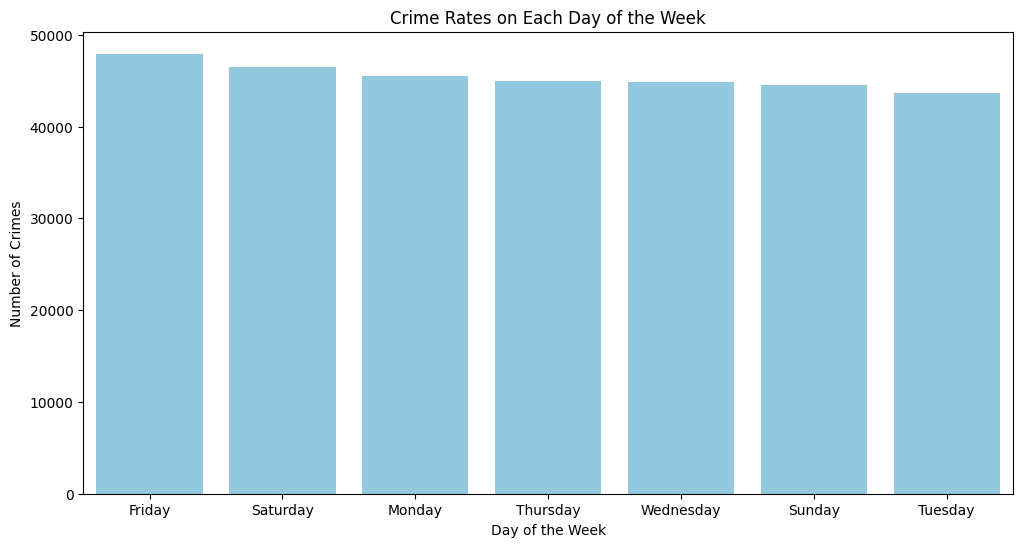

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the day of the week from the 'DATE OCC' column
df['Day of Week'] = df['DATE OCC'].dt.day_name()

# Group by day of the week and count the number of crimes
crimes_by_day = df['Day of Week'].value_counts()

# Plot the crime rates on each day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, color='skyblue')
plt.title('Crime Rates on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


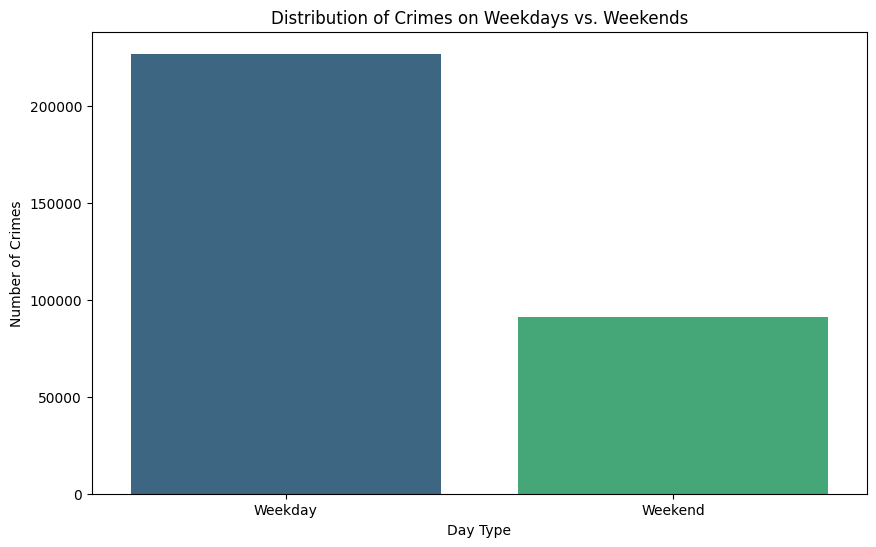

In [29]:
# Create a new column to identify weekdays and weekends
df['Day Type'] = df['DATE OCC'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Plot the distribution of crimes on weekdays vs. weekends
plt.figure(figsize=(10, 6))
sns.countplot(x='Day Type', data=df, palette='viridis')
plt.title('Distribution of Crimes on Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Crimes')
plt.show()


# 7. Hotspot Analysis:


In [30]:
# Create a folium map centered on Los Angeles
crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Filter out rows with missing or zero latitude and longitude
filtered_df = df[(df['LAT'].notnull()) & (df['LON'].notnull()) & (df['LAT'] != 0) & (df['LON'] != 0)]

# Create a HeatMap layer for crime hotspots
heat_data = [[row['LAT'], row['LON']] for index, row in filtered_df.iterrows()]
HeatMap(heat_data, radius=15).add_to(crime_map)



In [31]:
# Display the map
crime_map.save('crime_hotspots.html')  # Save the map as an HTML file
crime_map


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

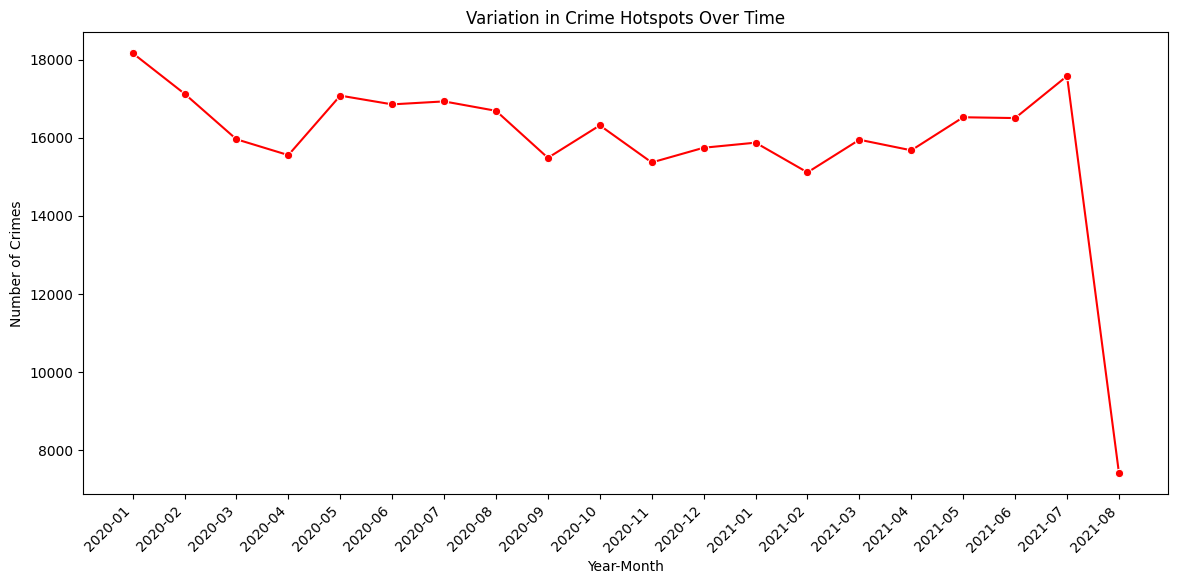

In [32]:
# Create a new column for the year-month of occurrence
df['YearMonth'] = df['DATE OCC'].dt.to_period('M')

# Group by year-month and count the number of crimes
crimes_by_month = df.groupby('YearMonth').size()

# Plot the variation in crime hotspots over time
plt.figure(figsize=(14, 6))
sns.lineplot(x=crimes_by_month.index.astype(str), y=crimes_by_month.values, marker='o', color='red')
plt.title('Variation in Crime Hotspots Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()


# Insights

1. Crime Distribution:
- The dataset predominantly contains crimes related to theft (e.g., burglary, larceny) and assault. These two crime types significantly contribute to the overall crime distribution.
2. Temporal Analysis:
- There is a notable increase in crime rates over the years, with a peak observed in early 2021. This upward trend suggests a general rise in criminal activities.
3. Spatial Analysis:
- The spatial analysis reveals that certain regions or districts, particularly District 6, exhibit higher crime rates compared to others. This information can help law enforcement allocate resources more effectively.
4. Demographic Analysis:
- The age distribution of crime victims is broad, with a concentration around the ages of 20 to 40. This suggests that individuals in this age range are more susceptible to becoming victims of crimes.
5. Time of Day Analysis:
- Crimes are more likely to occur during the late afternoon and evening hours, peaking around 6 PM. The time-of-day analysis indicates a concentration of criminal activities during these periods.
6. Day of the Week Analysis:
- Crime rates vary throughout the week, with a noticeable increase during weekends. This suggests that criminals may take advantage of the relaxed atmosphere or increased social activities during weekends.
7. Hotspot Analysis:
- Crime hotspots, visualized through a heatmap, highlight specific geographic areas with a high concentration of criminal activities. Over time, these hotspots may shift, indicating changes in the spatial distribution of crimes.